<a href="https://colab.research.google.com/github/Afreen89/-Detection-of-Pneumonia-in-Medical-Images/blob/main/Vgg_19_For_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tqdm import tqdm
import random
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''

def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['no_pneumonia']:
                label = 0
            elif folderName in ['pneumonia']:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

'''

"\n\ndef get_data(folder):\n    X = []\n    y = []\n    for folderName in os.listdir(folder):\n        if not folderName.startswith('.'):\n            if folderName in ['no_pneumonia']:\n                label = 0\n            elif folderName in ['pneumonia']:\n                label = 1\n            else:\n                label = 2\n            for image_filename in tqdm(os.listdir(folder + folderName)):\n                img_file = cv2.imread(folder + folderName + '/' + image_filename)\n                if img_file is not None:\n                    img_file = skimage.transform.resize(img_file, (150, 150, 3))\n                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))\n                    img_arr = np.asarray(img_file)\n                    X.append(img_arr)\n                    y.append(label)\n    X = np.asarray(X)\n    y = np.asarray(y)\n    return X,y\n\n"

In [ ]:
CATEGORIES = ['no_pneumonia' , 'pneumonia']

In [ ]:
train_dir = r'/content/drive/MyDrive/ML/Pneumonia/data-task1/train'
val_dir =  r'/content/drive/MyDrive/ML/Pneumonia/data-task1/val'
test_dir =  r'/content/drive/MyDrive/ML/Pneumonia/data-task1/test'
def pre_pro(DIRECTORY):

  data = []
  #pre-processing
  for category in CATEGORIES:
        folder = os.path.join(DIRECTORY, category)
        label = CATEGORIES.index(category)
        for img in tqdm(os.listdir(folder)):
                img_path = os.path.join(folder, img)
                #print(img_path)
                #img_arr = cv2.imread(img_path)
                #img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_arr = cv2.imread(img_path)
                img_arr = cv2.resize(img_arr, (224, 224))
                data.append([img_arr, label])
         
  len(data)
  random.shuffle(data)

  X = []
  Y = []
    
  for features, labels in data:
   X.append(features)
   Y.append(labels)
    
  #X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  X = np.array(X)
  y = np.array(Y)
  return X, y

In [ ]:
X_train, y_train = pre_pro(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/train')
X_test, y_test= pre_pro(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/test')
X_val, y_val= pre_pro(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/val')


100%|██████████| 110/110 [00:03<00:00, 28.51it/s]


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3000, 224, 224, 3)
(500, 224, 224, 3)
(500, 224, 224, 3)


In [ ]:

# from keras.utils.np_utils import to_categorical
# y_train = to_categorical(y_train, num_classes = 2)
# y_test = to_categorical(y_test, num_classes = 2)
# y_val = to_categorical(y_val, num_classes = 2)


In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3000,)
(500,)
(500,)


In [ ]:
#dont run,, pickle saved
import pickle
pickle.dump(X_train, open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/X_train.pkl', 'wb'))
pickle.dump(y_train, open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/y_train.pkl', 'wb'))
pickle.dump(X_test, open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/X_test.pkl', 'wb'))
pickle.dump(y_test, open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/y_test.pkl', 'wb'))
pickle.dump(X_val, open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/X_val.pkl', 'wb'))
pickle.dump(y_val, open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/y_val.pkl', 'wb'))


In [ ]:
import pickle

X_train = pickle.load(open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/X_train.pkl','rb'))
y_train = pickle.load(open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/y_train.pkl','rb'))
X_test = pickle.load(open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/X_test.pkl','rb'))
y_test = pickle.load(open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/y_test.pkl','rb'))
X_val = pickle.load(open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/X_val.pkl','rb'))
y_val = pickle.load(open(r'/content/drive/MyDrive/ML/Pneumonia/data-task1/y_val.pkl','rb'))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)


In [ ]:
train_datagen.fit(X_train)
val_datagen.fit(X_val)
test_datagen.fit(X_test)

In [ ]:
weight_for_0 = 0.35
weight_for_1 = 0.65

class_weight = {0:weight_for_0, 1: weight_for_1}

In [ ]:
import seaborn as sns

In [ ]:
from keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.models import load_model
from keras.models import Model
from tensorflow.keras import regularizers
vgg19 = VGG19(input_shape=[224,224,3], weights='imagenet', include_top=False)
for layer in vgg19.layers:
    layer.trainable = False

X = vgg19.output
X = BatchNormalization()(X)
X = Flatten()(X) 

X = Dense(512, activation='relu')(X) 
X = Dropout(0.5)(X)
#output = BatchNormalization()(X)

X = Dense(256, activation='relu')(X) 
X = Dropout(0.5)(X)
#output = BatchNormalization()(X)

X = Dense(128, activation='relu')(X) 
X = Dropout(0.5)(X)
#output = BatchNormalization()(X)

X = Dense(64, activation='relu')(X) 
X = Dropout(0.5)(X)
#output = BatchNormalization()(X)

output = Dense(2, activation='softmax')(X) 
model = Model(inputs=vgg19.input, outputs=output)

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.03)

model.compile(optimizer='sgd', 
              loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
'''
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', 
                             verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', 
                      min_delta=0, patience=20, verbose=1, mode='auto')
'''
hist = model.fit(X_train,y_train ,validation_data=(X_test,y_test), epochs=100, batch_size =32, class_weight= class_weight)

Epoch 1/100
94/94 [==============================] - 41s 325ms/step - loss: 0.3815 - accuracy: 0.6500 - val_loss: 0.4779 - val_accuracy: 0.8040
Epoch 2/100
94/94 [==============================] - 18s 196ms/step - loss: 0.3138 - accuracy: 0.6767 - val_loss: 0.4741 - val_accuracy: 0.7920
Epoch 3/100
94/94 [==============================] - 18s 196ms/step - loss: 0.2802 - accuracy: 0.6983 - val_loss: 0.5006 - val_accuracy: 0.7520
Epoch 4/100
94/94 [==============================] - 19s 198ms/step - loss: 0.2528 - accuracy: 0.7200 - val_loss: 0.4680 - val_accuracy: 0.7640
Epoch 5/100
94/94 [==============================] - 19s 199ms/step - loss: 0.2453 - accuracy: 0.7457 - val_loss: 0.4791 - val_accuracy: 0.7500
Epoch 6/100
94/94 [==============================] - 19s 200ms/step - loss: 0.2354 - accuracy: 0.7490 - val_loss: 0.4582 - val_accuracy: 0.7840
Epoch 7/100
94/94 [==============================] - 19s 202ms/step - loss: 0.2261 - accuracy: 0.7727 - val_loss: 0.4629 - val_accuracy:

In [ ]:
model.save('path/vgg19100epochs.h5');

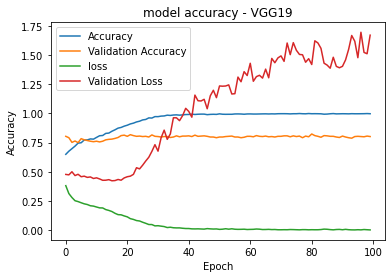

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model accuracy - VGG19")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

pred = model.predict(X_test)

16/16 [==============================] - 2s 137ms/step


In [ ]:
#pred 

In [ ]:
pred = np.argmax(pred, axis=1)

In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [ ]:
#true = np.argmax(y_test,axis=1)

In [ ]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

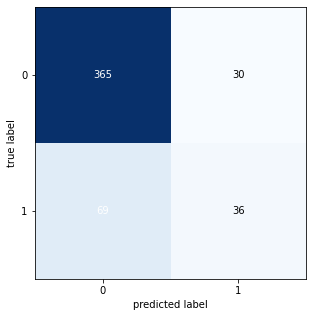

In [ ]:
CM = confusion_matrix(y_test,pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM, figsize=(5,5))
plt.show()

In [ ]:
y_test.shape

(500,)

In [ ]:
from sklearn.metrics import accuracy_score
pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, np.round(pred1))*100

In [ ]:
pred1.shape

(500, 2)

In [ ]:
print(CM)

[[361  34]
 [ 63  42]]


In [ ]:
tn,fp,fn,tp = CM.ravel()

In [ ]:
prec = tp/(tp+fp)*100

In [ ]:
prec

55.26315789473685

In [ ]:
recall = tp/(tp+fn)*100
f1 = 2*prec*recall/(prec+recall)

In [ ]:
recall

46.666666666666664

In [ ]:
f1

48.0392156862745